# Laboratorio 1 Redes Neuronales
#### Alumno: Dany Rubiano
#### Profesor: Gonzalo Acuña
#### Ayudante: Ignacio Ibañez


## Perceptón Simple

### 1. Marco teórico del perceptrón simple
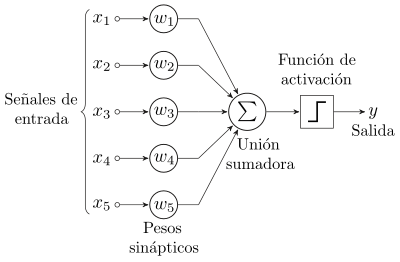
El perceptrón dentro del campo de las redes neuronales tiene dos acepciones. Puede referirse a un tipo de red neuronal artificial desarrollada por Frank Rosenblatt y, dentro de esta teoría emitida por Rosenblatt, también puede entenderse como la neurona artificial o unidad básica de inferencia en forma de discriminador lineal, a partir de lo cual se desarrolla un algoritmo capaz de generar un criterio para seleccionar un sub-grupo a partir de un grupo de componentes más grande. La limitación de este algoritmo es que si dibujamos en un plot estos elementos, se deben poder separar con un hiperplano únicamente los elementos “deseados” discriminándolos (separándolos) de los “no deseados”. El perceptrón puede utilizarse con otros perceptrones u otro tipo de neurona artificial, para formar redes neuronales más complicadas.

El perceptrón usa una matriz para representar las redes neuronales y es un discriminador terciario que traza su entrada X (un vector binario) a un único valor de salida f(x) (un solo valor binario) a través de dicha matriz.


Donde W es un vector de pesos reales y W ⋅ X es el producto escalar (que computa una suma ponderada). U es el ‘umbral’, el cual representa el grado de inhibición de la neurona, es un término constante que no depende del valor que tome la entrada.

El valor de f(x) (0 o 1) se usa para clasificar X como un caso positivo o un caso negativo, en el caso de un problema de clasificación binario. El umbral puede pensarse de como compensar la función de activación, o dando un nivel bajo de actividad a la neurona del rendimiento. La suma ponderada de las entradas debe producir un valor mayor que U para cambiar la neurona de estado 0 a 1.

#### Aprendizaje

En el perceptrón, existen dos tipos de aprendizaje, el primero utiliza una tasa de aprendizaje mientras que el segundo no la utiliza. Esta tasa de aprendizaje amortigua el cambio de los valores de los pesos.

El algoritmo de aprendizaje es el mismo para todas las neuronas, todo lo que sigue se aplica a una sola neurona en el aislamiento. Se definen algunas variables primero:

El x(j) denota el elemento en la posición J en el vector de la entrada.
El w(j) el elemento en la posición J en el vector de peso.
El Y denota la salida de la neurona.
El δ denota la salida esperada.
El α es una constante tal que 0 < α < 1
Los dos tipos de aprendizaje difieren en este paso. Para el primer tipo de aprendizaje, utilizando tasa de aprendizaje, utilizaremos la siguiente regla de actualización de los pesos:

w(j)′ = w(j) + α(δ − y) x(j)
Para el segundo tipo de aprendizaje, sin utilizar tasa de aprendizaje, la regla de actualización de los pesos será la siguiente:

w(j)′ = w(j) + (δ − y) x(j)
Por lo cual, el aprendizaje es modelado como la actualización del vector de peso después de cada iteración, lo cual sólo tendrá lugar si la salida Y difiere de la salida deseada δ. Para considerar una neurona al interactuar en múltiples iteraciones debemos definir algunas variables más:

Xi denota el vector de entrada para la iteración i
Wi denota el vector de peso para la iteración i
Yi denota la salida para la iteración i
Dm = {(x1, y1), … ,(xm, ym)} denota un periodo de aprendizaje de M iteraciones.
En cada iteración el vector de peso es actualizado como sigue:

Para cada pareja ordenada (X, Y) en Dm = {(X1, Y1), … ,(Xm, Ym)}
Pasar (Xi, Yi, Wi) a la regla de actualización w(j)′ = w(j) + α(δ − Y) x(j)
El periodo de aprendizaje Dm se dice que es separable linealmente si existe un valor positivo Y y un vector de peso W tal que: Yi ⋅ (⟨W, Xi⟩ + U) > Y para todos los i.

Novikoff probó que el algoritmo de aprendizaje converge después de un número finito de iteraciones si los datos son separables linealmente y el número de errores está limitado a:


Sin embargo si los datos no son separables linealmente, la línea de algoritmo anterior no se garantiza que converja. (Sinfallas, 2017)

### 2. Código del perceptrón simple
A continuación se detalla el código que implementa el algoritmo del perceptrón simple.

Los parámetros corresponden a:
1. n, que indica el numero de iteraciones.
2. Matriz, cuyas dos primeras entradas en cada tupla son los dos valores de entrada. El segundo elemento de la tupla es el resultado esperado. Y la tercera entrada de la matriz es una entrada "ficticia" (también llamada sesgo) que se necesita para mover el umbral (también conocido como el límite de decisión).
3. eta, que corresponde a una variable que controla la tasa de aprendizaje.

El algoritmo inicia eligiendo tres números aleatorios como pesos iniciales.
Luego, se encuentran los valores ideales para los pesos w , reduciendo la magnitud del error a cero, a medida que se itera
Para ello, se calcula el producto escalar de los vectores de entrada y peso, cuyo resultado se compara con el valor esperado. Si el valor esperado es mayor, se aumentan los pesos, si es más pequeño, se disminuyen. Este factor de corrección se calcula multiplicando el error con la tasa de aprendizaje "eta" y el vector de entrada "x". Luego se agrega al vector de ponderaciones para mejorar los resultados en la siguiente iteración.

In [ ]:
from random import choice 
from numpy import array, dot, random
from pylab import plot, ylim 

unit_step = lambda x: 0 if x < 0 else 1

def perceptron(n, training_data, eta, tipo_compuerta):
    w = random.rand(3)
    errors = [] 
    for i in range(n): 
        x, expected = choice(training_data) 
        result = dot(w, x) 
        error = expected - unit_step(result) 
        errors.append(error) 
        w += eta * error * x
    
    print(tipo_compuerta)
    for x, _ in training_data: 
        result = dot(x, w) 
        print("{}: {} -> {}".format(x[:2], result, unit_step(result)))
    
    return errors

def plot_error(errors):
    ylim([-1,1]) 
    plot(errors)

### 3. Resultado gráfico de las compuertas lógicas con el perceptrón simple
Una vez implementado el perceptrón simple, se procede a realizar las diferentes pruebas para las compuertas lógicas AND, OR y XOR.

#### 3.1. Compuerta OR

Compuerta OR
[0 0]: -0.0842562823475016 -> 0
[0 1]: 0.5980663894413691 -> 1
[1 0]: 0.36303403423152336 -> 1
[1 1]: 1.045356706020394 -> 1


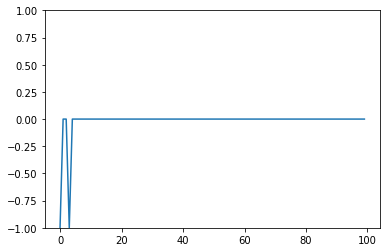

In [2]:
training_data_or = [ 
    (array([0,0,1]), 0), 
    (array([0,1,1]), 1), 
    (array([1,0,1]), 1), 
    (array([1,1,1]), 1), ]

eta = 0.2 
n = 100
errors_or = perceptron(n, training_data_or, eta, 'Compuerta OR')
plot_error(errors_or)

#### 3.2 Compuerta AND

Compuerta AND
[0 0]: -0.5008783216540402 -> 0
[0 1]: -0.038120730046421525 -> 0
[1 0]: -0.3539214153772294 -> 0
[1 1]: 0.10883617623038933 -> 1


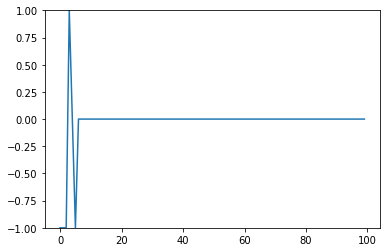

In [3]:
training_data_and = [ 
    (array([0,0,1]), 0), 
    (array([0,1,1]), 0), 
    (array([1,0,1]), 0), 
    (array([1,1,1]), 1), ]

eta = 0.2 
n = 100

errors_and = perceptron(n, training_data_and, eta, 'Compuerta AND')
plot_error(errors_and)

#### 3.3 Compuerta XOR con perceptrón simple

Compuerta XOR
[0 0]: 0.03486581363440866 -> 1
[0 1]: 0.19009286734325365 -> 1
[1 0]: -0.1955588783018407 -> 0
[1 1]: -0.040331824592995724 -> 0


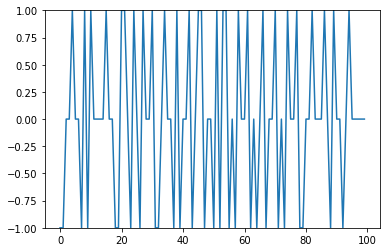

In [4]:
training_data_xor = [ 
    (array([0,0,1]), 0), 
    (array([0,1,1]), 1), 
    (array([1,0,1]), 1), 
    (array([1,1,1]), 0), ]

eta = 0.2 
n = 100

errors_xor = perceptron(n, training_data_xor, eta, 'Compuerta XOR')
plot_error(errors_xor)

### 4. Análisis de los resultados del perceptrón simple
A partir de los resultados anteriores, se puede observar como las compuertas AND y OR tienden a converger al resultado esperado con no más de 10 o 20 iteraciones, lo cual se puede explicar dado que las funciones que dan lugar a las compuertas son linealmente separables, es decir, que al trazar el hiperplano es posible discrimar entre los elementos deseados y no deseados, haciéndolas posibles para trabajar con un percentrón simple. Caso contrario sucede con la compuerta XOR, en donde no es posible separar con un solo hiperplano los elementos deseados y no deseados, por lo que la función que describe la compuerta no es linealmente separable. 
Para poder trabajar con XOR, se necesita entonces un perceptrón con más de una capa. 

## Extreme Learning Machine (ELM)
### 5. Marco Teórico de la ELM
Las Extreme Learning Machine (ELM) son redes neuronales predictivas para clasificación, regresión, clustering, aproximación dispersa, compresión y aprendizaje de características con una sola capa o múltiples capas de nodos ocultos, donde los parámetros de los nodos ocultos (no solo los pesos que conectan las entradas a los nodos ocultos) necesitan no estar sintonizado Estos nodos ocultos se pueden asignar aleatoriamente y nunca se actualizan (es decir, son proyecciones aleatorias) pero con transformaciones no lineales), o puede ser heredado de sus antepasados sin ser cambiado. En la mayoría de los casos, los pesos de salida de los nodos ocultos generalmente se aprenden en un solo paso, que básicamente equivale a aprender un modelo lineal. (Wikipedia, 2017) 

El algoritmo de la ELM consiste en:
1. Asignar aleatoriamente los pesos de conexión entre la capa de entrada y la capa oculta W1 y los bias B.
2. Calcular la matriz de salida de la capa oculta H = g(W1X + B).
3. Obtener los pesos entre la capa oculta y la capa de salida usando el método de mínimos cuadrados W2 = H+ T donde H+ corresponde al inverso generalizado de Moore-Penrose de la matrix H, obteniendo todos los pesos de la red.
4. Usar la red con el conjunto de test, usando para obtener la salida H = g(W1X2 + B) con el conjunto de test y la salida de la red por T∗ = g2(HW2).
(Ibañez, 2018).

Donde:

X: Datos de entrada al modelo.
T: Datos de salida esperados.
T∗: Datos de salida obtenidos por el modelo.
B: Bias de la capa oculta.
W1: Pesos entre la capa de entrada y oculta.
W2: Pesos entre la cada oculta y de salida.
g(x): Función de activación en la capa oculta.
g2(x): Función de activación en la capa salida.
X2: conjunto de test.


### 6. Código de la ELM
A continuación se detalla el código que implementa el algoritmo de la ELM.

Los parámetros corresponden a:

1. X_train, que corresponde a la matriz de entrada para el entrenamiento.
2. X_test, que corresponde a la matriz de entrada para la prueba.
3. T_train, que corresponde a la salida esperada para el entrenamiento.
4. T_test, que corresponde a la salida esperada para la prueba.
5. capa_entrada, número de nodos de la capa de entrada.
6. capa_oculta, número de nodos de la capa oculta.

In [213]:
from random import choice 
from numpy import array, dot, random, tanh, ones, argmax, zeros, sort, arange
from pylab import plot, ylim 
from numpy.linalg import inv
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def elm(X_train, X_test, T_train, T_test, capa_entrada, capa_oculta, tipo_compuerta, dataset):
    w1 = random.rand(capa_entrada,capa_oculta)
    w1 = normalize(w1)
    B = ones(capa_oculta)
    #Entrada a capa oculta 
    H = tanh(dot(X_train,w1)+B)

    #prediccion
    H_trans = H.transpose()
    
    w2 = dot(dot(H_trans,inv(dot(H,H_trans))),T_train)
    y = dot(tanh(dot(X_test,w1)+B),w2)

    prediccion = []
    esperados = []
    predichos = []
    correcto = 0
    total = y.shape[0]
    if(dataset == 0):
        print(tipo_compuerta) 
    for i in range(total):
        predicho = argmax(y[i])
        predichos.append(predicho)
        esperado = argmax(T_test[i]) 
        esperados.append(esperado)
        correcto = correcto + (1 if predicho == esperado else 0)
        prediccion.append(correcto/total)
        if(dataset == 0):
            print("{} -> {}".format(X[i], predecir))
    if(dataset == 0):
        print('Prediccion {:f}'.format(correcto/total))
    cm = confusion_matrix(esperados, predichos)
        
    return 1-(correcto/total), prediccion, cm

def plot_elm(resultado_esperado, prediccion, nombre):
    plt.scatter(resultado_esperado, prediccion)
    plt.title(nombre)
    plt.xlabel('Cantidad de nodos ocultos')
    plt.ylabel('Error')
    plt.grid()
    plt.show()

    
def get_cm(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title('Matriz de Confusion')
    plt.colorbar()
    tick_marks = arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Reales')
    plt.xlabel('Predichos')

### 7. Resultados gráficos de las compuertas lógicas con la ELM
#### 7.1 Compuerta OR con ELM

Compuerta OR
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 0
Prediccion 0.250000


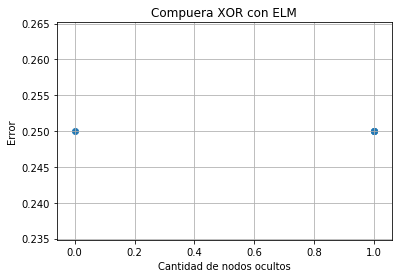

In [201]:
X = array([[0,0],[0,1],[1,0],[1,1]])
T_or = array([[1,0],[0,1],[0,1],[0,1]])
capa_entrada = 2
capa_oculta = 2

error, prediccion, cm = elm(X,X,T_or,T_or,capa_entrada,capa_oculta,'Compuerta OR',0)
plot_elm([0,1,1,1],prediccion,'Compuerta XOR con ELM')

#### 7.2 Compuerta AND con ELM

Compuerta AND
[0 0] -> 1
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1
Prediccion 0.250000


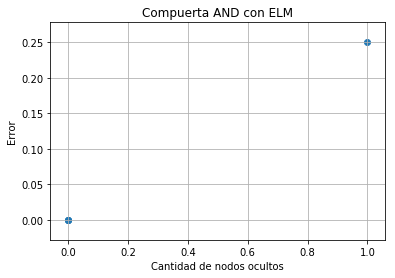

In [202]:
X = array([[0,0],[0,1],[1,0],[1,1]])
T_and = array([[1,0],[1,0],[1,0],[0,1]])
capa_entrada = 2
capa_oculta = 2

error, prediccion, cm = elm(X,X,T_and,T_and,capa_entrada, capa_oculta,'Compuerta AND',0)
plot_elm([0,0,0,1],prediccion,'Compuerta AND con ELM')

#### 7.3 Compuerta XOR con ELM

Compuerta XOR
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 0
Prediccion 0.500000


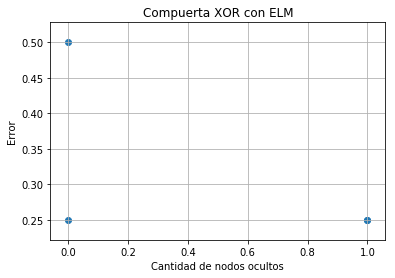

In [203]:
X = array([[0,0],[0,1],[1,0],[1,1]])
T_xor = array([[1,0],[0,1],[0,1],[1,0]])
capa_entrada = 2
capa_oculta = 2

error, prediccion, cm = elm(X,X,T_xor,T_xor,capa_entrada, capa_oculta,'Compuerta XOR',0)
plot_elm([0,1,1,0],prediccion,'Compuerta XOR con ELM')

### 8. Análisis de los resultados de la ELM
A partir de la prueba de la ELM con cada una de las compuertas, se puede observar que los resultados de la ELM difieren para cada una de las verificaciones realizadas. La predicción varía en torno a un 25% hasta el 100%, cuyo valor mínimo siempre será así, dado que solo se tienen solo dos tipos de salida para la clasificación y solamente 4 pruebas. Generalmente la predicción ronda entre el 50% y 75%.

En comparación con los resultados obtenidos mediante el uso del perceptrón simple, la ELM sólo necesita una iteración, por lo que es de suma importancia elegir bien los pesos iniciales. Así mismo, a través de esta sola iteración, la ELM puede obtener mejores resultados que el perceptrón simple, y puede abarcar la función de la compuerta XOR, que tal como se dijo anteriormente no era linealmente separable.

### 9. Iris DataSet
El dataset Iris es un conjunto de datos multivariante introducido por Ronald Fisher en su papel de 1936 The use of multiple measurements in taxonomic problems, como un ejemplo de análisis discriminante lineal. Representa datos usados para cuantificar la variación morfológica del Iris con flores de tres especies relacionadas. 
El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Mide cuatro rasgos de cada muestra: lo largo y lo ancho del sépalos y pétalos, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher se desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.
Este es quizás el dataset más conocido que se encuentra en la literatura de reconocimiento de patrones.

Teniendo en cuenta las características del dataset, como no tiene ningún atricbuto perdido y las clases tienen la misma cantidad de instancias, no es necesario un preprocesamiento que vaya más allá de la normalización de los datos.

### 10. Código de lectura del dataset
Con las herramientas que otorga el paquete sklearn, es posible hacer la importación de la base de datos escogida.

En función de cómo es cargado el dataset, se dispone que las características se encuentran en ".data" y la clasificación en ".target".

In [205]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
X = normalize(X)
clasificacion = data.target
total = clasificacion.shape[0]
T = []
for i in range(total):
    T.append([1,clasificacion[i]])

### 11. Resultado gráfico del dataset

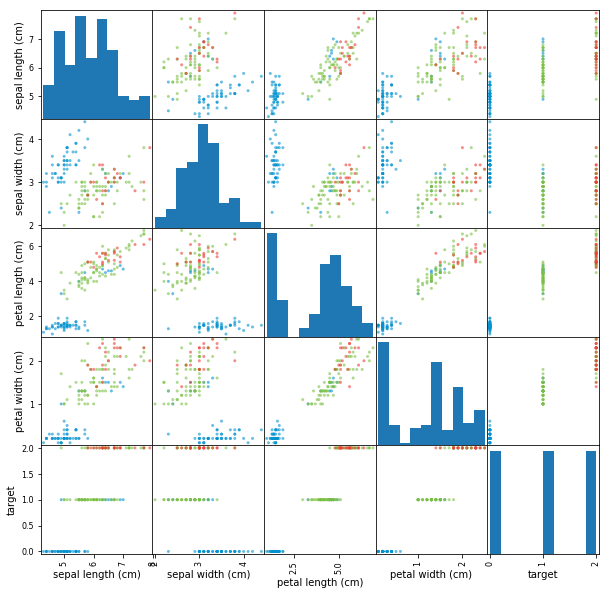

In [186]:
from pandas.plotting import scatter_matrix
import pandas as pd

iris_data = pd.DataFrame(data=data['data'],columns=data['feature_names'])
iris_data["target"] = data['target']

color_wheel = {1: "#0392cf", 2: "#7bc043", 3: "#ee4035"}
colors = wine_data["target"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.6, figsize=(10, 10), diagonal='hist')

### 12. Código  para los conjuntos de train y test
Para la división en conjuntos de entrenamiento y prueba,se hace uso dela función "train_test_split", disponible en el paquete "sklearn". Los datos para el entrenamiento corresponden al 70%, mientras que los datos para la prueba corresponden al porcentaje restante.

In [206]:
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3)
print('Train: {train}, Test: {test}'.format(train=X_train.shape[0], test=X_test.shape[0]))

Train: 105, Test: 45


### 13. Código de diferentes configuraciones de la ELM
Una vez hecha las divisiones de los datos para los conjuntos de prueba y entrenamiento, se procede a realizar diferentes pruebas de la ELM con distintas cantidades de nodos en la capa oculta. Para ello, se establece aleatoriamente un vector con las cantidades de nodos, para luego iterar con los valores generados. 

In [209]:
capa_entrada = 4

capa_oculta = random.randint(5,100,size=15)
capa_oculta = sort(capa_oculta)

errors = []
cms = []

for i in range(capa_oculta.shape[0]):
    error, prediccion, cm = elm(X_train,X_test,T_train,T_test,capa_entrada,capa_oculta[i],'Dataset IRIS',1)
    errors.append(error)
    errors.append(cm)

#Nota, a veces aparece un error que  me quito toda  lattarde en intentarlo resolver, 
# y es que en los random hay cirtos numeros que hacen que  w2 sea una matriz sinngular
#SI SUCEDE POR FAVOR CORRER DENUEVO ESTE CODIGO

### 14. Resultado gráfico de número de neuronas vs error en el conjunto de test y matriz de confusión del mejor modelo
A partir de las diferentes pruebas y de la información guardada, se procede a obtener el grafico del error versus la variación de la cantidad de nodos ocultos. Posteriormente, se obtiene la matriz de confusión del mejor modelo.

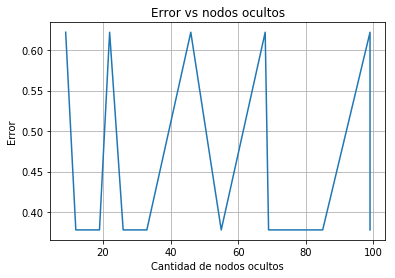

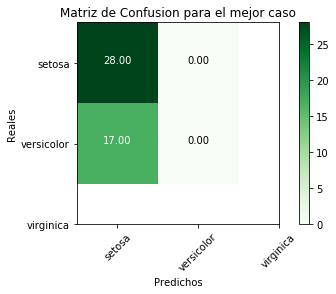

In [217]:
plt.plot(capa_oculta,errors)
plt.title('Error vs nodos ocultos')
plt.xlabel('Cantidad de nodos ocultos')
plt.ylabel('Error')
plt.grid()
plt.show()

classes = data.target_names
get_cm(cm, classes)

### 15. Análisis de resultados dataset con ELM
Los resultados obtenidos afirman que para la clasificación a través de la ELM, es de mayor importancia los pesos w1 asignados inicalmente, que la cantidad de nodos ocultos utilizados. Esto se observa a través del gráfico de error generado según la variación de los nodos de la capa oculta, donde se presentan resultados similares a pesar de su incremento.

La matriz de confusión en este caso, muestra que la clasificación alcanzada es de mala calidad, en el sentido que presenta un gran error. Esto puede ser dada una incorrecta implementación del algoritmo, o a un error en la construcción de la matriz.

### 16. Conclusiones
Una vez terminada la experiencia, se puede concluir que no se han cumplido a cavalidad con los objetivos propuestos, dado que en el caso de la ELM en las pruebas con el dataset escogido, se desconoce si los resultados obtenidos obedecen a errores de implementación de los algoritmos, o realmente representan la clasificación real que se debería obtener. Dado esto, las conclusiones en torno a ello no pueden ser del todo acertivas.

Con respecto al perceptrón simple, se demuestra que cuando el problema abarca la clasificación de funciones linealmente separables, con sólo dos clases, esta podría ser una solución muy útil y fácil de implementar. Casos no linealmente separables precisan de más de una capa, perceptrón multicapa.

El uso de la ELM permite trabajar con casos no linealmente separables y según la implementación realizada, precisan de sólo una iteración para su entrenamiento y posterior prueba para la clasificación. En comparación con el perceptrón simple, no requiere de gran afinación de los parámetros, siendo muy rápida para el entrenamiento. No utiliza la retropropagación como lo hacen los perceptrones multicapas, ajustándose del mismo modo que un modelo de regresión múltiple. Sus aproximaciones son matemáticas y se construyen en base a un mapeo inicialmente aleatorio. Con los resultados obtenidos, en específico de las pruebas con las compuertas lógicas, se denota que el mapeo inicial incide poderosamente en los resultados, en este caso en la clasificación.


### 17. Bibliografía
Bargen (Marzo 2013). Programming a Perceptron in Python. Recuperado de https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/

Sinfallas (Noviembre 2017). El perceptrón y perceptrón multicapa ¿Qué es y con que se come? Recuperado de https://sinfallas.wordpress.com/2017/11/14/el-perceptron-y-perceptron-multicapa-que-es-y-con-que-se-come/.

Wikipedia (2017). Extrem Learning Machine. Recuperado de https://en.wikipedia.org/wiki/Extreme_learning_machine

Huang, Zhu, Siew (2005). Extreme learning machine: Theory and applications. Recuperado de http://www.ntu.edu.sg/home/egbhuang/pdf/ELM-NC-2006.pdf

Ibañez (2018). Laboratorio 1. Recuperado de http://www.udesantiagovirtual.cl/moodle2/pluginfile.php?file=%2F234424%2Fmod_resource%2Fcontent%2F2%2FLaboratorio_1_RN.pdf